# <center><font color='#333333'>Use Python to Process PDF Work</font></center>
### <center><font color='#3b5998'>Created by cyda - Yeung Wong & Carrie Lo</font></center>

--------------------------------------------------------------------------------------
![logo](https://4.bp.blogspot.com/-LAXjdvVCYCU/WxeQFKQ-1wI/AAAAAAAAACs/o8IJ1eLLAEwQYv2Az7EqQi9jODTqRx7wACK4BGAYYCw/s1000/tight%2Bbanner_with_description.png)

--------------------------------------------------------------------------------------
Please acknowledge <b>team cyda - Yeung Wong & Carrie Lo</b> when using the code

<b><font color='#3b5998'>If you find this script is helpful, please feel free to endorse us through Linkedin!</font></b>

<b>Linkedin:</b>

Yeung Wong - https://www.linkedin.com/in/yeungwong/

Carrie Lo - https://www.linkedin.com/in/carrielsc/

--------------------------------------------------------------------------------------

# Step 0 - Preliminary

## 0.1 import packages

In [1]:
import fitz as pymupdf # !pip install PyMuPDF
import re
from IPython.display import display, Image
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)

## 0.2 define the path

In [2]:
pdf_path = 'Apple Annual Report 2021.pdf'

# Step 1 - Extract Information

## 1.1 basic information

In [3]:
f = pymupdf.open(pdf_path)
print('Page Number:', f.page_count)
print('Creation Date:', f.metadata['creationDate'])
print('Modified Date:', f.metadata['modDate'])
print('\nTable of Content:\n', [toc[1] for toc in f.get_toc()])
f.close()

Page Number: 82
Creation Date: D:20211028161753+00'00'
Modified Date: D:20211028161753+00'00'

Table of Content:
 ['Cover Page', 'TABLE OF CONTENTS', 'PART I', 'Item 1. Business', 'Item 1A. Risk Factors', 'Item 1B. Unresolved Staff Comments', 'Item 2. Properties', 'Item 3. Legal Proceedings', 'Item 4. Mine Safety Disclosures', 'PART II', "Item 5. Market for Registrant's Common Equity, Related Stockholder Matters and Issuer Purchases of Equity Secutities", 'Item 6. [Reserved]', "Item 7. Management's Discussion and Analysis of Financial Condition and Results of Operations", 'Fiscal Year Highlights', 'Products and Services Performance', 'Segment Operating Performance', 'Gross Margin', 'Operating Expenses', 'Other Income/(Expense), Net', 'Provision for Income Taxes', 'Liquidity and Capital Resources', 'Critical Accounting Estimates', 'Item 7A. Quantitative and Qualitative Disclosures About Market Risk', 'Item 8. Financial Statements and Supplementary Data', 'Index to Consolidated Financial

## 1.2 extract text

In [4]:
f = pymupdf.open(pdf_path)
txt = f.load_page(22).get_text()
start_idx = txt.find('Fiscal Year Highlights')
txt = txt[start_idx:]
txt = re.sub("\nApple Inc. \| 2021 Form 10-K \| \d+\n", "", txt)
print(txt)
f.close()

Fiscal Year Highlights
COVID-19 Update
The COVID-19 pandemic has had, and continues to have, a significant impact around the world, prompting governments and 
businesses to take unprecedented measures, such as restrictions on travel and business operations, temporary closures of 
businesses, and quarantine and shelter-in-place orders. The COVID-19 pandemic has at times significantly curtailed global 
economic activity and caused significant volatility and disruption in global financial markets. The COVID-19 pandemic and the 
measures taken by many countries in response have affected and could in the future materially impact the Company’s business, 
results of operations and financial condition, as well as the price of the Company’s stock.
During 2021, aspects of the Company’s business continued to be affected by the COVID-19 pandemic, with many of the 
Company’s retail stores, as well as channel partner points of sale, temporarily closed at various times, and a significant number 
of t

## 1.3 extract image

[(489, 0, 46, 56, 8, 'DeviceRGB', '', 'Im1', 'DCTDecode')]


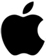

In [5]:
f = pymupdf.open(pdf_path)
img_list = f.load_page(0).get_images()
print(img_list)
img_xref = img_list[0][0]
img_data = f.extract_image(img_xref)
img_f = open("img." + img_data["ext"], "wb")
img_f.write(img_data["image"])
img_f.close()
f.close()
display(Image(filename="img." + img_data["ext"]))

## 1.4 extract table

In [6]:
f = pymupdf.open(pdf_path)
txt = f.load_page(2).get_text()
f.close()

temp_table_list = txt[txt.find('Part I'):].split('\n')
temp_table_list = [cell for cell in temp_table_list if cell not in ['Part I', 'Part II', 'Part III', 'Part IV', '']]
table_list = []
cell = ''
while len(temp_table_list) > 0:
    temp_cell = temp_table_list.pop(0)
    if cell != '':
        temp_cell = cell + temp_cell
        cell = ''
    if temp_cell[-1] == ' ':
        cell = temp_cell
    else:
        table_list.append(temp_cell)
table = pd.DataFrame(np.array(table_list).reshape(-1, 3), columns=['Item', 'Details', 'Page Number'])
table

,Item,Details,Page Number
0,Item 1.,Business,1
1,Item 1A.,Risk Factors,6
2,Item 1B.,Unresolved Staff Comments,17
3,Item 2.,Properties,17
4,Item 3.,Legal Proceedings,17
5,Item 4.,Mine Safety Disclosures,17
6,Item 5.,"Market for Registrant’s Common Equity, Related Stockholder Matters and Issuer Purchases of Equity Securities",18
7,Item 6.,[Reserved],19
8,Item 7.,Management’s Discussion and Analysis of Financial Condition and Results of Operations,20
9,Item 7A.,Quantitative and Qualitative Disclosures About Market Risk,26


# Step 2 - Modification

## 2.1 insert a new page

In [7]:
f = pymupdf.open(pdf_path)
f.new_page(0, 612.0, 792.0)
f.save("Modified Apple Annual Report 2021.pdf")
f.close()

## 2.2 delete pages

In [8]:
f = pymupdf.open(pdf_path)
print('Original Page Number:', f.page_count)
f.delete_pages(range(0, f.page_count, 2))
print('Modified Page Number:', f.page_count)
f.save("Modified Apple Annual Report 2021.pdf")
f.close()

Original Page Number: 82
Modified Page Number: 41


## 2.3 add text

In [9]:
f = pymupdf.open(pdf_path)
page = f.new_page(0, 612.0, 792.0)
text_writer = pymupdf.TextWriter(page.rect)

# Compulsory
pos = (100, 200)
text = "https://blog.cyda.hk/"

# Optional
font_style = pymupdf.Font("helv")
font_size = 50
font_opacity = 0.5
font_color = (0, 0, 1)

text_writer.append(pos, text, font=font_style, fontsize=font_size)
text_writer.write_text(page, opacity=font_opacity, color=font_color)
f.save("Modified Apple Annual Report 2021.pdf")
f.close()

## 2.4 add image

In [10]:
f = pymupdf.open(pdf_path)
page = f.new_page(0, 612.0, 792.0)

x = 100
y = 200
w = 300
h = 300
img_rect = pymupdf.Rect(x, y, x+w, y+h)
page.insert_image(img_rect, filename="img.jpeg")

f.save("Modified Apple Annual Report 2021.pdf")
f.close()

# Step 3 - Export

## 3.1 split PDF

In [11]:
f = pymupdf.open(pdf_path)
new_f = pymupdf.open()
new_f.insert_pdf(f, from_page=0, to_page=1)
new_f.save("Modified Apple Annual Report 2021.pdf")
new_f.close()
f.close()

## 3.2 combine PDF

In [12]:
pdf1_path = 'Apple Annual Report 2021.pdf'
pdf2_path = 'Apple Annual Report 2021.pdf'
f1 = pymupdf.open(pdf1_path)
f2 = pymupdf.open(pdf2_path)
f1.insert_pdf(f2)
f1.save("Modified Apple Annual Report 2021.pdf")
f1.close()
f2.close()

## 3.3 export as images

In [13]:
f = pymupdf.open(pdf_path)
page = f.load_page(0)
pix = page.get_pixmap()
pix.save("page.png")